# Linear Regression Part (A)
## Getting the Dataset

Here, we are getting our previous dataset from previous assignment and using it to apply simple/multiple linear regression on to it. We are using the drinks dataset.

In [886]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "./"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])
drink_Data.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


### Useful functions
There are 3 useful function that can be found in the Tutorial_5_Regression.ipynb file. One noteable method that we used throughout this project was the normalize_numeric_minmax which help us on normalizing certain column that was not standarize when first observing the dataset.

In [887]:
#Function to normalize columns
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [888]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.abc.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [889]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

## Simple Linear Regression

Creating a new dataset for holding onto the columns needed for Simple Linear Regression. In the new dataset we made, it has a new column called 'Combine_Servings' that takes the total amount of beer, spirit, and wine serverings.

In [890]:
import pandas as pd

drink_Data.head()

new_drink_Data = drink_Data[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']]

new_drink_Data['Combine_Servings'] = new_drink_Data[['beer_servings', 'spirit_servings', 'wine_servings']].sum(axis=1)

new_drink_Data.head()

C:\Users\sho85\AppData\Local\Temp\ipykernel_18532\1029753255.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_drink_Data['Combine_Servings'] = new_drink_Data[['beer_servings', 'spirit_servings', 'wine_servings']].sum(axis=1)


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Combine_Servings
0,0,0,0,0.0,0
1,89,132,54,4.9,275
2,25,0,14,0.7,39
3,245,138,312,12.4,695
4,217,57,45,5.9,319


### Preprocess our dataset
Look for outliers on the columns of interest: 'total_litres_of_pure_alcohol', 'Combine_Servings'

In [891]:
# Compute the Z-score to assess outliers
Z_drink_data = new_drink_Data[['total_litres_of_pure_alcohol', 'Combine_Servings']].copy()
# Compute Z-score
Z_drink_data = (Z_drink_data-Z_drink_data.mean())/Z_drink_data.std()
print('Number of rows before discarding outliers = %d' % (Z_drink_data.shape[0]))
Z2 = Z_drink_data.loc[((Z_drink_data > -3).sum(axis=1)==2) & ((Z_drink_data <= 3).sum(axis=1)==2)]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 193
Number of rows after discarding outliers = 193


### Preparing our train/test
Here, we create an x and y varaible that looks at the independent variable, Combine_Servings, and the dependent variable, Total_Litres_of_Pure_Alcohol. We then use the train_test_split method to split of our data into 2 different types, one for training and one for testing. We made the test size take 25% of the data and stored it to a random seed on 1.

In [892]:
x = new_drink_Data.iloc[:, 4].values #independent variable arrays, Combine_Servings
y = new_drink_Data.iloc[:, 3].values #dependent variable arrays, Total_Litres_Of_Pure_Alcohol

In [893]:
# Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=1)

In [894]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(144,)
(144,)
(49,)
(49,)


The code snippet below is to reshape the training and testing of the independent variable into a 2-dimensional arrays for plotting purposes

In [895]:
# Making the training and testing 2 Dimensional arrays
x_train = np.array(x_train).reshape(-1, 1)
x_train

array([[274],
       [571],
       [385],
       [275],
       [  6],
       [583],
       [ 86],
       [328],
       [  6],
       [643],
       [404],
       [ 51],
       [ 55],
       [111],
       [123],
       [219],
       [106],
       [ 28],
       [553],
       [  0],
       [112],
       [  0],
       [  6],
       [234],
       [431],
       [369],
       [ 57],
       [  0],
       [ 49],
       [ 57],
       [665],
       [ 56],
       [279],
       [605],
       [488],
       [  0],
       [559],
       [  0],
       [  6],
       [640],
       [ 56],
       [634],
       [257],
       [134],
       [156],
       [ 39],
       [ 11],
       [295],
       [134],
       [439],
       [ 17],
       [  0],
       [233],
       [123],
       [638],
       [325],
       [380],
       [ 82],
       [529],
       [  0],
       [504],
       [169],
       [185],
       [ 83],
       [ 17],
       [382],
       [600],
       [122],
       [370],
       [ 72],
       [ 17],
      

In [896]:
x_test = np.array(x_test).reshape(-1, 1)
x_test

array([[459],
       [124],
       [ 21],
       [426],
       [ 43],
       [349],
       [197],
       [596],
       [130],
       [ 54],
       [ 62],
       [ 39],
       [216],
       [591],
       [147],
       [463],
       [ 45],
       [349],
       [152],
       [ 80],
       [ 36],
       [319],
       [  0],
       [436],
       [ 18],
       [  0],
       [ 30],
       [141],
       [ 11],
       [407],
       [ 44],
       [ 11],
       [ 23],
       [188],
       [ 50],
       [352],
       [328],
       [ 23],
       [398],
       [  0],
       [273],
       [360],
       [165],
       [541],
       [ 20],
       [  6],
       [120],
       [113],
       [565]], dtype=int64)

### Fitting
Here, we fit the training variables and display the intercept and slope of the line once fitted.

In [897]:
# Fitting
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [898]:
regressor.score(x_test, y_test)

0.6980800923002739

In [899]:
regressor.score(x_train, y_train)

0.9140145685882098

In [900]:
intercept = regressor.intercept_
intercept

0.5227534772978712

### Predicting
In this section, we use the predict method to predict the outcome of x_test and store it into a variable used for plotting to see how close our predicted model resembles our actual data

In [901]:
# Predicting; y_pred are the predicted results of the Combine_Servings
y_pred = regressor.predict(x_test)
y_pred

array([ 8.4791027 ,  2.67218115,  0.88676945,  7.90707759,  1.26811953,
        6.57235234,  3.93757003, 10.8538736 ,  2.77618572,  1.45879456,
        1.59746732,  1.19878315,  4.26691782, 10.76720313,  3.07086532,
        8.54843907,  1.30278771,  6.57235234,  3.15753579,  1.90948101,
        1.14678087,  6.05232951,  0.52275348,  8.08041853,  0.83476717,
        0.52275348,  1.0427763 ,  2.96686075,  0.71342851,  7.5777298 ,
        1.28545362,  0.71342851,  0.92143764,  3.78156318,  1.38945819,
        6.62435462,  6.20833636,  0.92143764,  7.42172295,  0.52275348,
        5.25496118,  6.76302737,  3.38287901,  9.90049842,  0.86943536,
        0.62675804,  2.60284478,  2.48150612, 10.31651668])

Plotting the training and testing data using scatter plot and a line plot.
Here, blue indicates the train model, orange representing the testing data, and the red plotted line is the predicted data.

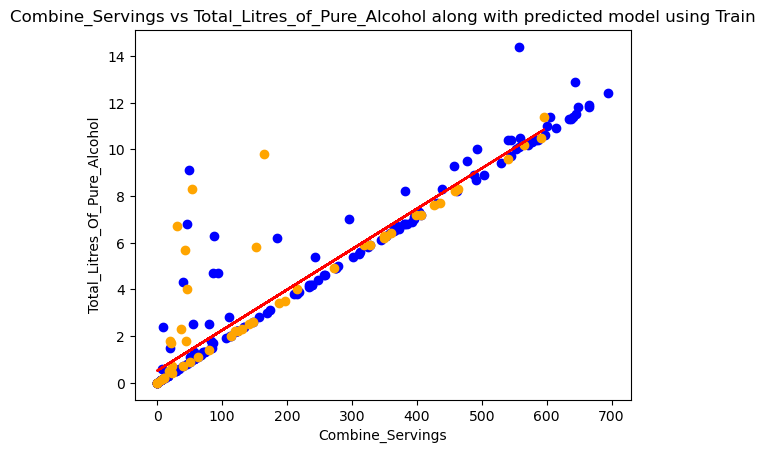

In [902]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, c='blue') # plotting the training data
plt.scatter(x_test, y_test, c='orange') # plotting the testing data
plt.plot(x_test, y_pred, color='red') # plotting the observation line but using the predicted dependent variable

plt.title("Combine_Servings vs Total_Litres_of_Pure_Alcohol along with predicted model using Train") # stating the title of the graph
 
plt.xlabel("Combine_Servings") # adding the name of x-axis
plt.ylabel("Total_Litres_Of_Pure_Alcohol") # adding the name of y-axis
plt.show() # specifies end of graph

### Finding the mean squarred error and the R-squared on both the testing and training models.
Mean Squared Error: how much the residuals vary around the fitted lines <br>
R-Squared: Correlation between x and y; ranges from 0 to 1; higher the number the better the model

In [903]:
# Model evaluation
print("Root mean squared error on testing = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared on testing= %.4f' % r2_score(y_test, y_pred))

Root mean squared error on testing = 1.8266
R-squared on testing= 0.6981


## Lasso Regression

We use lasso regression here as a method to reduce overfitting for the drinks dataset and to create a more accuracate prediction 

In [904]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)

lasso_reg.fit(x_train, y_train)

print("Lasso regression score on train:", lasso_reg.score(x_train, y_train))
print("Lasso regression score on test:", lasso_reg.score(x_test, y_test))

Lasso regression score on train: 0.9104229115882162
Lasso regression score on test: 0.7116759135013287


In [905]:
y_pred_lasso_test = lasso_reg.predict(x_test)
y_pred_lasso_test

array([ 8.25308869,  2.81018009,  1.13668879,  7.71692157,  1.49413353,
        6.46586497,  3.99624674, 10.47899459,  2.90766502,  1.6728559 ,
        1.80283581,  1.42914358,  4.30494902, 10.39775715,  3.18387232,
        8.31807864,  1.52662851,  6.46586497,  3.26510976,  2.0952906 ,
        1.38040111,  5.97844032,  0.79549153,  7.87939646,  1.08794632,
        0.79549153,  1.28291618,  3.08638739,  0.97421391,  7.40821929,
        1.51038102,  0.97421391,  1.16918377,  3.85001934,  1.60786595,
        6.51460744,  6.12466771,  1.16918377,  7.2619919 ,  0.79549153,
        5.23105585,  6.64458734,  3.47632711,  9.58538273,  1.1204413 ,
        0.89297646,  2.74519014,  2.63145772,  9.97532245])

Plotting the testing data and observing how closely our prediction resembles our testing data. Here we have two graphs that represents the simple linear regression test and when we use lasso regression to predict the outcome. <br>
We scatter the testing data on the graph and then use a plotted green line for lasso regression and a plotted red line for using linear regression

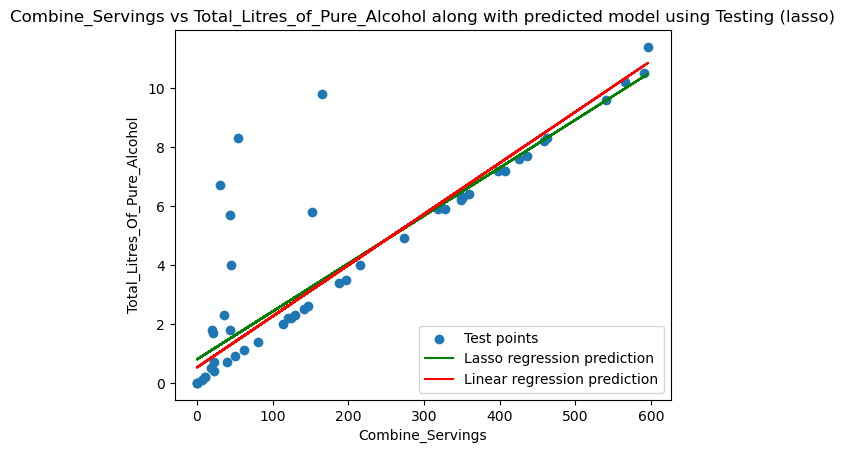

In [906]:
#plot for the Test data
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test) # data scattered on the graph 
plt.plot(x_test, y_pred_lasso_test, color='green') # plotting the observation line from Lasso Regression
plt.plot(x_test, y_pred, color='red') # plotting the observation line from Linear Regression

plt.title("Combine_Servings vs Total_Litres_of_Pure_Alcohol along with predicted model using Testing (lasso)") # stating the title of the graph
 
plt.xlabel("Combine_Servings") # adding the name of x-axis
plt.ylabel("Total_Litres_Of_Pure_Alcohol") # adding the name of y-axis
plt.legend(["Test points", "Lasso regression prediction", "Linear regression prediction"])
plt.show() # specifies end of graph

In [907]:
# Model evaluation
print("Root mean squared error on testing = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('R-squared on testing= %.4f' % r2_score(y_test, y_pred_lasso_test))

Root mean squared error on testing = 1.7850
R-squared on testing= 0.7117


## Multiple Linear Regression
Using the same dataset, drinks.csv, we used all three servings columns, beer, spirit, and wine, as independent variables and have the dependent variable be the Total_litres_of_Pure_Alcohol. We then split the data into training and testing varaibles, saving only 25% for testing.

In [908]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

path = "./"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])

x_train2, x_test2, y_train2, y_test2 = train_test_split(
  drink_Data.drop(columns=['total_litres_of_pure_alcohol', 'country', 'continent']), 
  drink_Data['total_litres_of_pure_alcohol'], 
  test_size=0.25,
  random_state=0)
print("x_train shape: ", x_train2.shape)
print("y_train shape: ", y_train2.shape)

print("x_test shape: ", x_test2.shape)
print("y_test shape: ", y_test2.shape)

x_train shape:  (144, 3)
y_train shape:  (144,)
x_test shape:  (49, 3)
y_test shape:  (49,)


### Fitting the training models
In order to create a more accurate outcome, we fit the training model and display the y-intercept and slope.

In [909]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(x_train2, y_train2)

LinearRegression()

In [910]:
print("Multiple linear regression score on Train:", regr.score(x_train2, y_train2))
print("Multiple linear regression score on Test:", regr.score(x_test2, y_test2))
print("Multiple linear regression intercept:", regr.intercept_)
print("Multiple linear regression slope:", regr.coef_)

Multiple linear regression score on Train: 0.8905004885512054
Multiple linear regression score on Test: 0.8184310767713026
Multiple linear regression intercept: 0.6137880966226286
Multiple linear regression slope: [0.01803339 0.0163801  0.01632606]


Predicting the testing data

In [911]:
# Apply model to the test set
y_pred2 = regr.predict(x_test2)
y_pred2

array([ 0.6137881 ,  4.95718354,  8.44357939,  0.71697453,  0.6137881 ,
        1.62803282,  1.50468261,  1.57271168,  3.19396154,  4.10411377,
        5.28451951,  6.93048003,  7.23859976,  5.12989001,  0.82522893,
        6.07683173,  0.93838917,  4.77496331,  6.57519943,  1.9693534 ,
        0.96944203,  1.0822966 ,  0.6137881 ,  1.14641534,  1.38522416,
        1.68860262,  2.30220578,  4.87828059,  1.54050705,  2.07193951,
       11.71024539,  6.19537265,  3.19526609,  1.3775969 , 12.09615162,
        7.75070448,  1.29356602,  3.47884978, 11.59975079,  1.43406807,
        9.96099509,  0.71350582, 11.23522251,  2.06240732,  0.6137881 ,
        1.56573879, 11.41806541,  1.22190954,  2.72272402])

Plotting the testing and predicted output of our data. The graph shows what the actual values and predicted values are scattered around the graph and the dotted line is the where the testing lies on the graph. This helps us understand how closely our predicted values are to the data we split.

Root mean squared error = 1.5794
R-squared = 0.8184


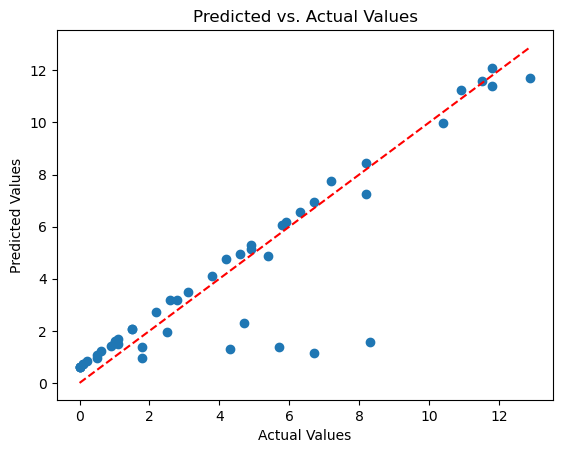

In [912]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test2, y_pred2)))
print('R-squared = %.4f' % r2_score(y_test2, y_pred2))


plt.scatter(y_test2, y_pred2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--')
plt.show()

# Regression and Classification PART (B) 
Using Admission dataset, we apply simple and multiple linear regression. First we grab the dataset and observe to see if there are any null values and if we need to normalize any columns.

In [913]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "./"

filename_read = os.path.join(path,"Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
admission_Data = pd.read_csv(filename_read, na_values=['NA','?'])

print(admission_Data.shape)
print(admission_Data.isnull().sum())
admission_Data.head(10)

(500, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Normalizing CGPA, GRE Score, TOEFL Score, University Rating, SOP, and LOR using the provided function in tutorial_5_regression

In [914]:
normalize_numeric_minmax(admission_Data, 'CGPA')
normalize_numeric_minmax(admission_Data, 'GRE Score')
normalize_numeric_minmax(admission_Data, 'TOEFL Score')
normalize_numeric_minmax(admission_Data, 'University Rating')

admission_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,4.5,4.5,0.913462,1,0.92
1,2,0.68,0.535714,0.75,4.0,4.5,0.663462,1,0.76
2,3,0.52,0.428571,0.50,3.0,3.5,0.384615,1,0.72
3,4,0.64,0.642857,0.50,3.5,2.5,0.599359,1,0.80
4,5,0.48,0.392857,0.25,2.0,3.0,0.451923,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,1.00,4.5,4.0,0.711538,1,0.87
496,497,0.94,0.892857,1.00,5.0,5.0,0.983974,1,0.96
497,498,0.80,1.000000,1.00,4.5,5.0,0.884615,1,0.93
498,499,0.44,0.392857,0.75,4.0,5.0,0.522436,0,0.73


### Split dataset and prepare data for training.
Train split 75% and test split 25%. We remove all the dependent/uncessary columns when storing the independent features into x and using 'Chance of Admit' column for our dependent variable.

In [915]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train3, x_test3, y_train3, y_test3 = train_test_split(
    admission_Data.drop(columns=['Serial No.', 'Research', 'Chance of Admit', 'SOP', 'LOR']),
    admission_Data['Chance of Admit'],
    test_size=0.25,
    random_state=3
)

print("x_train shape: ", x_train3.shape)
print("y_train shape: ", y_train3.shape)

print("x_test shape: ", x_test3.shape)
print("y_test shape: ", y_test3.shape)

x_train shape:  (375, 4)
y_train shape:  (375,)
x_test shape:  (125, 4)
y_test shape:  (125,)


Applying linear regression and fitting the trained variables

In [916]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(x_train3, y_train3)

LinearRegression()

Using the tested values once model was fitted by the trained variables to predict

In [917]:
# Apply model to the test set
y_pred3 = regr.predict(x_test3)

Graphing the tested and predicted data and observing how accurate our data is when we predicted the data

Root mean squared error = 0.0686
R-squared = 0.7524


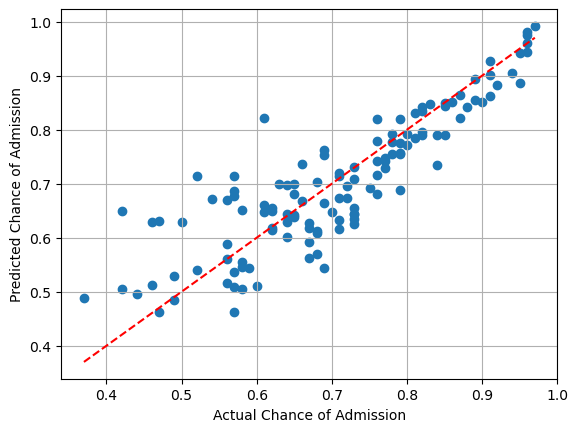

In [918]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test3, y_pred3)))
print('R-squared = %.4f' % r2_score(y_test3, y_pred3))

plt.scatter(y_test3, y_pred3)
plt.plot([min(y_test3), max(y_test3)], [min(y_test3), max(y_test3)], color='red', linestyle='--')
plt.xlabel("Actual Chance of Admission")
plt.ylabel("Predicted Chance of Admission")
plt.grid(True)
plt.show()

## Classification
In this section, we create a new column that stores up to 3 values: 'low', 'medium', and 'high'. This new column is used as our dependent varaible instead of 'Chance of Admit'.

In [919]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

path = "./"

filename_read = os.path.join(path,"Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
admission_Data = pd.read_csv(filename_read, na_values=['NA','?'])

print(admission_Data.shape)
print(admission_Data.isnull().sum())
admission_Data.head(10)

(500, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Normalizing our columns to present a more accurate model when we split it into training and testing varaibles.

In [920]:
normalize_numeric_minmax(admission_Data, 'CGPA')
normalize_numeric_minmax(admission_Data, 'GRE Score')
normalize_numeric_minmax(admission_Data, 'TOEFL Score')
normalize_numeric_minmax(admission_Data, 'University Rating')

admission_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,4.5,4.5,0.913462,1,0.92
1,2,0.68,0.535714,0.75,4.0,4.5,0.663462,1,0.76
2,3,0.52,0.428571,0.50,3.0,3.5,0.384615,1,0.72
3,4,0.64,0.642857,0.50,3.5,2.5,0.599359,1,0.80
4,5,0.48,0.392857,0.25,2.0,3.0,0.451923,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,1.00,4.5,4.0,0.711538,1,0.87
496,497,0.94,0.892857,1.00,5.0,5.0,0.983974,1,0.96
497,498,0.80,1.000000,1.00,4.5,5.0,0.884615,1,0.93
498,499,0.44,0.392857,0.75,4.0,5.0,0.522436,0,0.73


Creating a classification column for Chance of Admit where above 80% is high, 60% is medium, and anything under is a low chance of being admitted.

In [921]:
def categorize_admission(chance):
    if chance >= 0.8:
        return 2
    elif chance >= 0.6:
        return 1
    else:
        return 0

admission_Data['Admission_Status'] = admission_Data['Chance of Admit'].apply(categorize_admission)
admission_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission_Status
0,1,0.94,0.928571,0.75,4.5,4.5,0.913462,1,0.92,2
1,2,0.68,0.535714,0.75,4.0,4.5,0.663462,1,0.76,1
2,3,0.52,0.428571,0.50,3.0,3.5,0.384615,1,0.72,1
3,4,0.64,0.642857,0.50,3.5,2.5,0.599359,1,0.80,2
4,5,0.48,0.392857,0.25,2.0,3.0,0.451923,0,0.65,1
...,...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,1.00,4.5,4.0,0.711538,1,0.87,2
496,497,0.94,0.892857,1.00,5.0,5.0,0.983974,1,0.96,2
497,498,0.80,1.000000,1.00,4.5,5.0,0.884615,1,0.93,2
498,499,0.44,0.392857,0.75,4.0,5.0,0.522436,0,0.73,1


In the code snippet below, we create 2 variables called x and y in which grabs the independent and dependent varaibles, respectively. We remove SOP, LOP, Research, and Serial No. as it didn't provide enough for it to be consider to be helpful when taking into account the Chance for a student to be admitted

In [922]:
x = admission_Data.drop(columns=['Chance of Admit', 'Serial No.', 'Admission_Status', 'SOP', 'LOR', 'Research'])
# x = admission_Data['Chance of Admit']
y = admission_Data['Admission_Status']
x.head()


,GRE Score,TOEFL Score,University Rating,CGPA
0,0.94,0.928571,0.75,0.913462
1,0.68,0.535714,0.75,0.663462
2,0.52,0.428571,0.50,0.384615
3,0.64,0.642857,0.50,0.599359
4,0.48,0.392857,0.25,0.451923


Splitting up the data into train and testing variables; saving 25% for testing

In [923]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.25, random_state=10)
print(x_train4.shape)
print(y_train4.shape)
print(x_test4.shape)
print(y_test4.shape)
print(y_test4[:5])

(375, 4)
(375,)
(125, 4)
(125,)
151    2
424    2
154    2
190    2
131    1
Name: Admission_Status, dtype: int64


Here, we use the DecisionTreeClassifier instead of the normal linear regression as we are dealing with classification. We fit our training variables using clf.

In [924]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(x_train4, y_train4)

DecisionTreeClassifier(random_state=0)

Predicting our outcome with the DecisionTreeClassifier variable

In [925]:
y_pred4 = clf.predict(x_test4)
y_pred4

array([2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 0,
       1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0,
       2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1,
       1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2,
       0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2], dtype=int64)

## Compute the classification score on test data
We compute the classification score to provide us insight on how accuracte our testing is

Classification score on test:  0.688


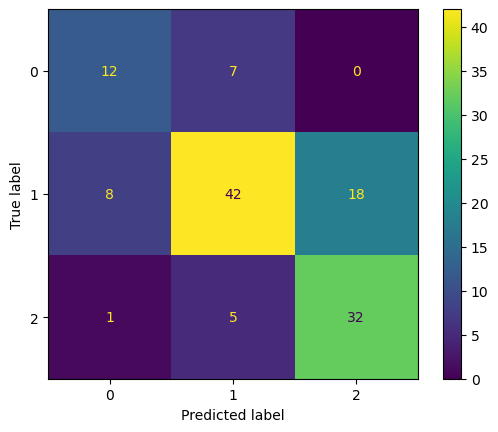

In [926]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Classification score on test: ", clf.score(x_test4, y_test4))
ConfusionMatrixDisplay.from_predictions(y_test4, y_pred4)

## Visualize the decision rules

In [927]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(x_train4.columns))
print(tree_rules)

|--- CGPA <= 0.65
|   |--- CGPA <= 0.39
|   |   |--- GRE Score <= 0.41
|   |   |   |--- CGPA <= 0.34
|   |   |   |   |--- GRE Score <= 0.07
|   |   |   |   |   |--- CGPA <= 0.27
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- CGPA >  0.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- GRE Score >  0.07
|   |   |   |   |   |--- class: 0
|   |   |   |--- CGPA >  0.34
|   |   |   |   |--- TOEFL Score <= 0.38
|   |   |   |   |   |--- CGPA <= 0.35
|   |   |   |   |   |   |--- TOEFL Score <= 0.23
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- TOEFL Score >  0.23
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- CGPA >  0.35
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- TOEFL Score >  0.38
|   |   |   |   |   |--- TOEFL Score <= 0.62
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- TOEFL Score >  0.62
|   |   |   |   |   |   |--- class: 0
|   |   |--- GRE Score >  0.41
|   |   |   |--- University Ra

If CGPA is less than or equal to 0.65 and GRE Score is less than or equal to 0.39 and SOP is less than or equal to 0.44 and LOR is less than or equal to 0.56, the predicted class is 0.

If CGPA is less than or equal to 0.65 and GRE Score is less than or equal to 0.39 and SOP is greater than 0.44 and CGPA is less than or equal to 0.34, the predicted class is 0.

If CGPA is greater than 0.65 and TOEFL Score is less than or equal to 0.80 and CGPA is greater than 0.67 and SOP is less than or equal to 0.94, the predicted class is 2.

If CGPA is greater than 0.65 and TOEFL Score is greater than 0.80 and SOP is less than or equal to 0.75, the predicted class is 2.

If CGPA is greater than 0.65 and TOEFL Score is greater than 0.80 and SOP is greater than 0.75, the predicted class is 1.
We noticed that SOP and LoR are not informative for the decisiontreeclassfier. By adding them in the input feature column set the classification accuracy on the test set drops by .03

Root mean squared error = 0.5797
R-squared = 0.2238


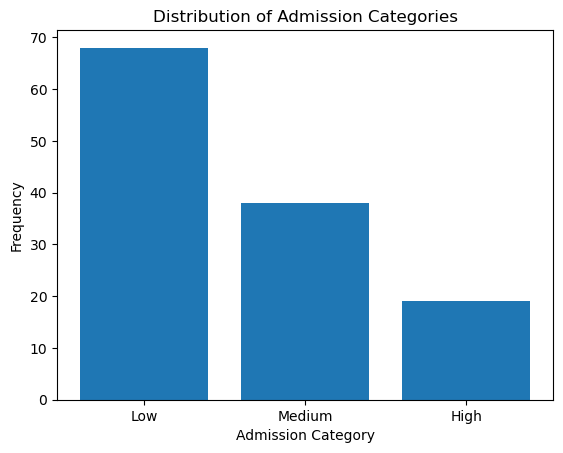

In [928]:
import matplotlib.pyplot as plt

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test4, y_pred4)))
print('R-squared = %.4f' % r2_score(y_test4, y_pred4))

# # Count the frequency of each category
category_counts = y_test4.value_counts()
# Define the categories and their order for the bar chart
categories = ['Low', 'Medium', 'High']
# Create a bar chart
plt.bar(categories, category_counts)
plt.xlabel('Admission Category')
plt.ylabel('Frequency')
plt.title('Distribution of Admission Categories')
plt.show()

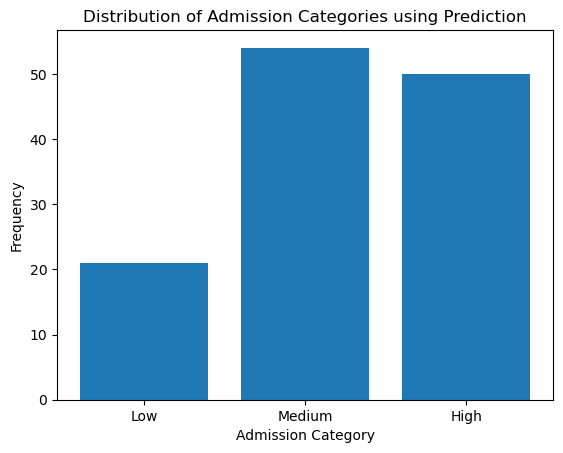

In [929]:
from collections import Counter

category_counts = Counter(y_pred4)
# Define the categories and their order for the bar chart
categories = ['Low', 'Medium', 'High']

# Initialize a list to store the counts in the order of categories
count_list = [category_counts[0], category_counts[1], category_counts[2]]
# Create a bar chart
plt.bar(categories, count_list)
plt.xlabel('Admission Category')
plt.ylabel('Frequency')
plt.title('Distribution of Admission Categories using Prediction')
plt.show()

## Applying Lasso Regression
In this section, we apply Lasso Regression onto the admission dataset in hopes of increasing our accuracy. We go through the same steps as the previous parts where we read the dataset, normalize certain columns and then split it to training and testing.

In [930]:
path = "./"

filename_read = os.path.join(path,"Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
admission_Data = pd.read_csv(filename_read, na_values=['NA','?'])

print(admission_Data.shape)
print(admission_Data.isnull().sum())
admission_Data.head(10)

normalize_numeric_minmax(admission_Data, 'CGPA')
normalize_numeric_minmax(admission_Data, 'GRE Score')
normalize_numeric_minmax(admission_Data, 'TOEFL Score')
normalize_numeric_minmax(admission_Data, 'University Rating')

admission_Data

(500, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,4.5,4.5,0.913462,1,0.92
1,2,0.68,0.535714,0.75,4.0,4.5,0.663462,1,0.76
2,3,0.52,0.428571,0.50,3.0,3.5,0.384615,1,0.72
3,4,0.64,0.642857,0.50,3.5,2.5,0.599359,1,0.80
4,5,0.48,0.392857,0.25,2.0,3.0,0.451923,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,1.00,4.5,4.0,0.711538,1,0.87
496,497,0.94,0.892857,1.00,5.0,5.0,0.983974,1,0.96
497,498,0.80,1.000000,1.00,4.5,5.0,0.884615,1,0.93
498,499,0.44,0.392857,0.75,4.0,5.0,0.522436,0,0.73


In [931]:
x = admission_Data.drop(columns=['Chance of Admit', 'Serial No.', 'SOP', 'LOR', 'Research'])
y = admission_Data['Chance of Admit']
x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.30, random_state=10)
print(x_train5.shape)
print(y_train5.shape)
print(x_test5.shape)
print(y_test5.shape)

(350, 4)
(350,)
(150, 4)
(150,)


Since we are using lasso regression, we create a variable for it in which uses the alpha amount of 0.01 that shrink, constraint, our data when fitting.

In [932]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso
alpha = 0.01  # You can tune this hyperparameter
lasso_model = linear_model.Lasso(alpha=alpha)
lasso_model.fit(x_train5, y_train5)

Lasso(alpha=0.01)

In [933]:
y_pred_test5 = lasso_model.predict(x_test5)

Root mean squared error = 0.0733
R-squared = 0.6860


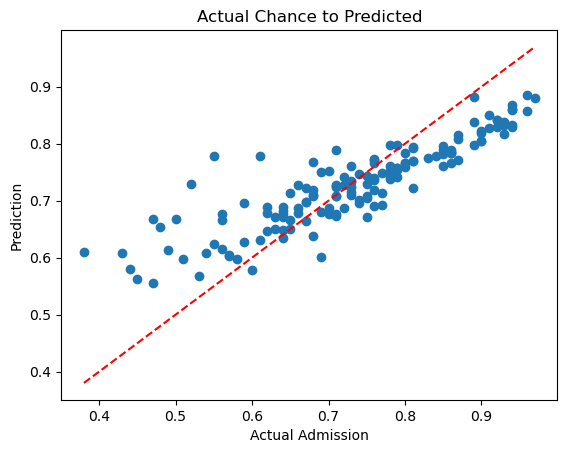

In [934]:
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test5, y_pred_test5)))
print('R-squared = %.4f' % r2_score(y_test5, y_pred_test5))
plt.scatter(y_test5, y_pred_test5)
plt.plot([min(y_test5), max(y_test5)], [min(y_test5), max(y_test5)], color='red', linestyle='--')
# plt.plot(y_test4, y_pred_test4, color = 'red')
plt.title('Actual Chance to Predicted')
plt.xlabel('Actual Admission')
plt.ylabel('Prediction')
plt.show()

# Classification Tree Part (C)

We take the dataset from the pdf file and create our own .csv file, copying the values from the dataset and loading it to entropy_dataset.

In [935]:
#Loading Entropy Dataset
import pandas as pd
import numpy as np

entropy_dataset = pd.read_csv('Entropy_ID3_Dataset.csv')

entropy_dataset


,color,shape,size,class
0,red,square,big,+
1,blue,square,big,+
2,red,round,small,-
3,green,square,small,-
4,red,round,big,+
5,green,round,big,-


### Initial Entropy

We find the initial entropy by finding entropy of all attributes then adding them together. Once calculated, we can use this determine the whether the entropy for various attributes is pure or impure; high or low entropy which helps when determining the route in the ID3 decision tree.

In [936]:
def initial_entropy(dataset, label, class_list):
    initial_entropy = {}
    for c in class_list:
        initial_entropy[c] = -(dataset[dataset[label] == c].shape[0] / dataset[label].shape[0]) * np.log2((dataset[label].shape[0] - dataset[dataset[label] == c].shape[0]) / dataset[label].shape[0])
    
    values = initial_entropy.values()
    
    return sum(values)

The function below calculates the average entropy. Using total_class_count, that gathers the total number of classes used to calculate the other variables for each individual entropy result. Afterwards, using each of those individual results, that gets applied together with the total_class_count to determine the average entropy for that given attribute.

In [937]:
import math
def average_entropy(train, label, class_list):
    
    average_entropy_list = {}
    average_ent = 0
    
    for c in class_list:
        total_class_count = train[train[label] == c].shape[0] #number of classes
        big_class_count = train[(train[label] == c) & (train['class'] == '+')].shape[0]
        left_eq = -(big_class_count/total_class_count) * np.log2(big_class_count/total_class_count)
        right_eq = -(total_class_count-big_class_count)/total_class_count * np.log2((total_class_count-big_class_count)/total_class_count)
        total_color_Entropy = left_eq + right_eq
        average_ent += ((total_class_count)/train.shape[0]) * np.nan_to_num(total_color_Entropy)
        
    return round(average_ent, 2)

### ID3 for each Label

We apply ID3 for each column and row in order to iteratively form the decision tree after calculating the different entropy results accordingly to the class column. In order to determine the tree results, the calculations above it uses are the initial entropy, the average entropy, and the information gain. Since the initial entropy is 1, it is determine to be highly impure

In [938]:
class_entropy = initial_entropy(entropy_dataset, 'class', ['+','-']) #Class
print(class_entropy)

1.0


### Average entropy and Gain outlook
Here, we can observe that the highest outlook is color, followed by size and then shape. We can use this information to determine our decision tree by first looking at color -> then size -> and lastly shape

In [939]:
color_average_entropy = average_entropy(entropy_dataset,'color', ['red','green','blue'])
print("Color avg enthrophy: ",color_average_entropy, "Gain outlook: ", 1-color_average_entropy)

shape_average_entropy = average_entropy(entropy_dataset,'shape', ['square','round']) #Shape
print("Shape avg enthrophy: ",shape_average_entropy, "Gain outlook: ", 1-shape_average_entropy)

size_average_entropy = average_entropy(entropy_dataset, 'size', ['big','small']) #Size
print("Size avg enthrophy: ", size_average_entropy, "Gain outlook: ", 1-size_average_entropy)


Color avg enthrophy:  0.46 Gain outlook:  0.54
Shape avg enthrophy:  0.92 Gain outlook:  0.07999999999999996
Size avg enthrophy:  0.54 Gain outlook:  0.45999999999999996


C:\Users\sho85\AppData\Local\Temp\ipykernel_18532\3213264682.py:10: RuntimeWarning: divide by zero encountered in log2
  left_eq = -(big_class_count/total_class_count) * np.log2(big_class_count/total_class_count)
C:\Users\sho85\AppData\Local\Temp\ipykernel_18532\3213264682.py:10: RuntimeWarning: invalid value encountered in scalar multiply
  left_eq = -(big_class_count/total_class_count) * np.log2(big_class_count/total_class_count)
C:\Users\sho85\AppData\Local\Temp\ipykernel_18532\3213264682.py:11: RuntimeWarning: divide by zero encountered in log2
  right_eq = -(total_class_count-big_class_count)/total_class_count * np.log2((total_class_count-big_class_count)/total_class_count)
C:\Users\sho85\AppData\Local\Temp\ipykernel_18532\3213264682.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  right_eq = -(total_class_count-big_class_count)/total_class_count * np.log2((total_class_count-big_class_count)/total_class_count)


## Decision Tree
In this section we grab the dataset and change all the columns classification into numerical classification. We created methods to help us do so

In [940]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

entropy_dataset = pd.read_csv('Entropy_ID3_Dataset.csv')

entropy_dataset

,color,shape,size,class
0,red,square,big,+
1,blue,square,big,+
2,red,round,small,-
3,green,square,small,-
4,red,round,big,+
5,green,round,big,-


Method for changing the string values into numerical values

In [941]:
def color_Change(chance):
    if chance == 'red':
        return 0
    elif chance == 'green':
        return 1
    else:
        return 2
    
def shape_Change(chance):
    if chance == 'square':
        return 0
    else:
        return 1
    
def size_Change(chance):
    if chance == 'big':
        return 0
    else:
        return 1

In [942]:
entropy_dataset['color'] = entropy_dataset['color'].apply(color_Change)
entropy_dataset['shape'] = entropy_dataset['shape'].apply(shape_Change)
entropy_dataset['size'] = entropy_dataset['size'].apply(size_Change)

entropy_dataset

,color,shape,size,class
0,0,0,0,+
1,2,0,0,+
2,0,1,1,-
3,1,0,1,-
4,0,1,0,+
5,1,1,0,-


Beneath here, we split the code into training and testing variables

In [943]:
x = entropy_dataset[['color', 'shape', 'size']]
y = entropy_dataset['class']

In [944]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(x, y, test_size=.30, random_state=1)

We then use the Decision Tree with min leaf nodes as 5 and the max depth of 3.

In [945]:
clf_entropy = DecisionTreeClassifier(random_state=10, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train6, y_train6)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=10)

Because our dataset is so small, our prediction will only have 2 predicted values

In [946]:
y_pred_en = clf_entropy.predict(x_test6)
y_pred_en

array(['+', '+'], dtype=object)

We then find the accuracy score between the tested and predicted values which comes to a 50% accuracy as our dataset is really small for us to use properly

In [947]:
print("Accuracy: ", accuracy_score(y_test6, y_pred_en))

Accuracy:  0.5


Classification score on test:  0.5


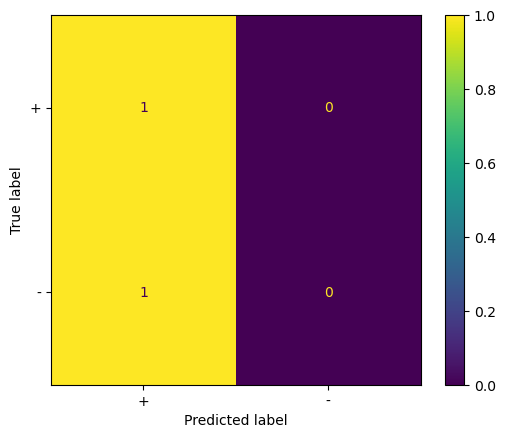

In [948]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Classification score on test: ", clf_entropy.score(x_test6, y_test6))
ConfusionMatrixDisplay.from_predictions(y_test6, y_pred_en)

Below, the decision tree for the ID3 is generated.

In [949]:
from sklearn.tree import export_text

tree_rules = export_text(clf_entropy, feature_names=list(x_train6.columns))
print(tree_rules)   

|--- class: +



### (ii) Report

If we were to add a new missing attribute after creating the tree, the tree would need to re-adjust itself for the missing attribute value. Another reason for this result can come from the fact that the tree needs to reassign the initial entropy and find out the new gain output for that newly added attribute. As a result, the missing attribute can shift the decision tree if that missing attribute tilts the gain output, which would affect how the decision will be made. Therefore, if a data scientist provided their results while having a missing attribute, a new decision tree would be made. If their results were used in decision making on how many million more shirts to produce next year, then yes, they should consider recreating the tree with the missing attribute because with new data, it can skew the data due to having outdated data and effectively change the results reliablity and accuracy.  Yes, there are some cases where a missing attribute can be a make or break deal and could impress the CEO of a company due to those reasons.